In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Example 1

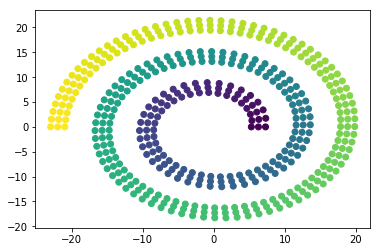

In [2]:
rho = np.pi * np.sqrt(np.linspace(4, 49, 150))

curve_1 = np.row_stack([(rho-1)*np.cos(rho), (rho-1)*np.sin(rho), rho])
curve_2 = np.row_stack([(rho+0)*np.cos(rho), (rho+0)*np.sin(rho), rho])
curve_3 = np.row_stack([(rho+1)*np.cos(rho), (rho+1)*np.sin(rho), rho])

X, Y, color = np.hstack([curve_1, curve_2, curve_3])

plt.scatter(X, Y, c=color)

In [3]:
points = np.column_stack([X, Y])

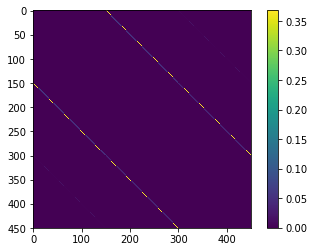

In [4]:
from scipy.spatial.distance import pdist, squareform
squared_distance = squareform(pdist(points, 'sqeuclidean'))

sigma = 1
W = np.exp(-squared_distance/sigma)

W_without_diag = W - np.diag(W.diagonal())
plt.imshow(W_without_diag, vmin=0, vmax=W_without_diag.max())
plt.colorbar()

In [5]:
from numpy.linalg import svd
D = np.diag(W.sum(axis=1))
L = D - W

U, Sigma, VT = svd(L)
print(Sigma[-10:])

[  5.92297029e-03   4.68312065e-03   3.58759900e-03   2.63698992e-03
   1.83180732e-03   1.17249354e-03   6.59416473e-04   2.92863059e-04
   7.30501685e-05   6.87290603e-16]


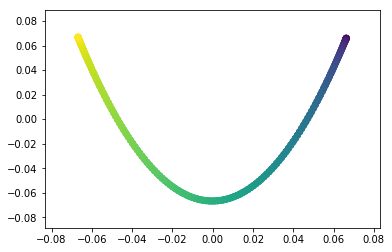

In [6]:
plt.scatter(U[:, -2], U[:, -3], c=color)

# Example 2

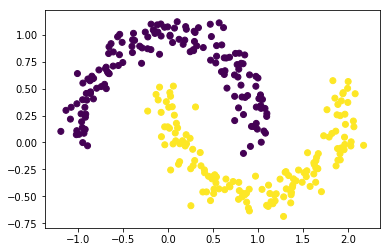

In [7]:
from sklearn.datasets import make_moons
points, clusters = make_moons(n_samples=300, noise=0.1)

plt.scatter(points[:, 0], points[:, 1], c=clusters)

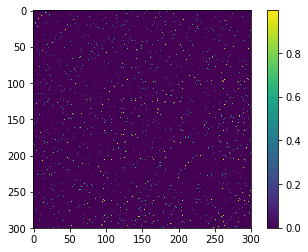

In [8]:
from scipy.spatial.distance import pdist, squareform
squared_distance = squareform(pdist(points, 'sqeuclidean'))

sigma = 0.01
W = np.exp(-squared_distance/sigma)

W_without_diag = W - np.diag(W.diagonal())
plt.imshow(W_without_diag, vmin=0, vmax=W_without_diag.max())
plt.colorbar()

In [9]:
from numpy.linalg import svd
D = np.diag(W.sum(axis=1))
L = D - W

U, Sigma, VT = svd(L)
print(Sigma[-10:])

[  7.03523076e-02   5.34940677e-02   3.62600586e-02   2.79160438e-02
   1.36283663e-02   6.76080758e-03   6.04048198e-03   4.02547424e-03
   4.68638610e-05   3.55292326e-15]


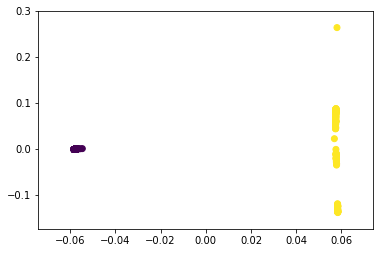

In [10]:
plt.scatter(U[:, -2], U[:, -3], c=clusters)

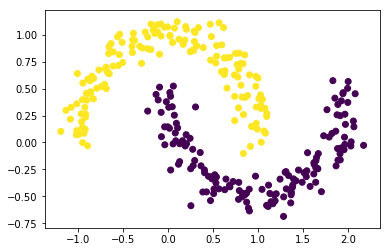

In [11]:
plt.scatter(points[:, 0], points[:, 1], c=(U[:, -2]<0))